In [1]:
# modules
import os
import glob
import numpy as np
from cshogi import BLACK, Board, CSA, HuffmanCodedPosAndEval, move16
from sklearn.model_selection import train_test_split

In [2]:
csa_file_list = sorted(glob.glob('../../input/floodgate/2020/*csa'))

file_list_train, file_list_test = train_test_split(
    csa_file_list, test_size=0.1
)

In [3]:
len(csa_file_list), len(file_list_train), len(file_list_test)

(73070, 65763, 7307)

In [4]:
HuffmanCodedPosAndEval

dtype([('hcp', 'u1', (32,)), ('eval', '<i2'), ('bestMove16', '<i2'), ('gameResult', 'i1'), ('dummy', 'u1')])

In [5]:
hcpes = np.zeros(1024, HuffmanCodedPosAndEval)

In [6]:
hcpes, hcpes.shape

(array([([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0),
        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0),
        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0),
        ...,
        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0),
        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0),
        ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0, 0, 0, 0)],
       dtype=[('hcp', 'u1', (32,)), ('eval', '<i2'), ('bestMove16', '<i2'), ('gameResult', 'i1'), ('dummy', 'u1')]),
 (1024,))

In [7]:
board = Board()

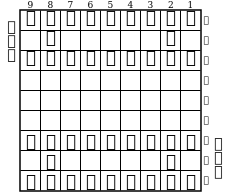

In [8]:
board

In [9]:
file_path = file_list_test[0]

for kif in CSA.Parser.parse_file(file_path):
    break
    
p = 0
for i, (move, score, comment) in enumerate(zip(kif.moves, kif.scores, kif.comments)):
    # 不正な指し手のある棋譜を除外
    if not board.is_legal(move):
        raise Exception()
    hcpe = hcpes[p]
    p += 1
    # 局面はhcpに変換
    board.to_hcp(hcpe["hcp"])
    # 16bitに収まるようにクリッピングする
    eval = min(32767, max(score, -32767))
    # 手番側の評価値にする
    hcpe["eval"] = eval if board.turn == BLACK else -eval
    # 指し手の32bit数値を16bitに切り捨てる
    hcpe["bestMove16"] = move16(move)
    # 勝敗結果
    hcpe["gameResult"] = kif.win
    board.push(move)
    print(i, move, score, comment)    

0 67470 129 129
1 73922 84 84 +7776FU -8485FU +2625FU -4132KI +8877KA -3334FU +7988GI -2233KA +7733UM -3233KI +8877GI -7172GI +6978KI -7374FU +3938GI -7273GI +3736FU -7364GI +3837GI -4344FU +3746GI -6152KI +5968OU -5142OU +3635FU -4232OU +3534FU -3334KI +0056KA -5243KI +5674KA
2 465597 132 132 -8485FU +2625FU -4132KI +2524FU -2324FU +2824HI -0023FU +2428HI -9394FU +9796FU -3334FU +3938GI -5142OU +7776FU -8586FU +8786FU -8286HI +3736FU -7172GI +3837GI -7374FU +3746GI -8173KE +7675FU -8684HI +7574FU -8474HI +8822UM -3122GI
3 74051 59 59 +2625FU -4132KI +9796FU -1314FU +3938GI -8586FU +8786FU -8286HI +0087FU -8682HI +7776FU -7172GI +3736FU -3334FU +3837GI -7374FU +2524FU -2324FU +2824HI -7273GI +2428HI -0023FU +3746GI -7364GI +4645GI -3233KI +6766FU
4 67341 123 123 -4132KI +9796FU -7172GI +3938GI -9394FU +4746FU -8586FU +8786FU -8286HI +3847GI -8685HI +0087FU -3334FU +7776FU -2233KA +3736FU -3142GI +2937KE -6364FU +4948KI -7263GI +8833UM -4233GI +6766FU -5142OU +7968GI -7374FU +6867GI -81

In [10]:
kif.endgame, len(kif.moves), kif.ratings, kif.sfen

('%TORYO',
 215,
 [0.0, 4027.0],
 'lnsgkgsnl/1r5b1/ppppppppp/9/9/9/PPPPPPPPP/1B5R1/LNSGKGSNL b - 1')

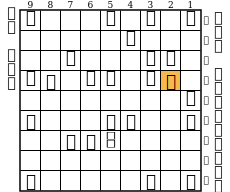

In [11]:
board

In [12]:
type(board)

cshogi._cshogi.Board